In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [4]:
from google.colab import files
import pandas as pd
import zipfile

# Upload the dataset
uploaded = files.upload()

# Unzip the uploaded file
with zipfile.ZipFile('WA_Fn-UseC_-Telco-Customer-Churn.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
print(data.head())

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv.zip to WA_Fn-UseC_-Telco-Customer-Churn.csv (1).zip
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic        

In [10]:
# Inspect column names
print(data.columns)

Index([         'customerID',       'SeniorCitizen',              'tenure',
            'MonthlyCharges',        'TotalCharges',               'Churn',
                           0,                     1,                     2,
                           3,                     4,                     5,
                           6,                     7,                     8,
                           9,                    10,                    11,
                          12,                    13,                    14,
                          15,                    16,                    17,
                          18,                    19,                    20,
                          21,                    22,                    23,
                          24,                    25,                    26,
                          27,                    28,                    29,
                          30,                    31,                    32,
            

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Handle missing values
data.ffill(inplace=True)

# Verify column names for categorical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

# Check if all categorical features are present in the DataFrame
missing_columns = [col for col in categorical_features if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")

# Proceed if no columns are missing
if not missing_columns:
    # Convert categorical data to numerical format
    encoder = OneHotEncoder()
    encoded_features = encoder.fit_transform(data[categorical_features]).toarray()

    # Combine encoded features with the rest of the data
    data = data.drop(columns=categorical_features)
    encoded_df = pd.DataFrame(encoded_features, index=data.index)
    data = pd.concat([data, encoded_df], axis=1)

    # Feature engineering
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
    data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())
    data['avg_usage_per_month'] = data['TotalCharges'] / data['tenure']

    # Split data into features and target variable
    X = data.drop(columns=['customerID', 'Churn'])
    y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Convert feature names to strings
    X.columns = X.columns.astype(str)

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Missing columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


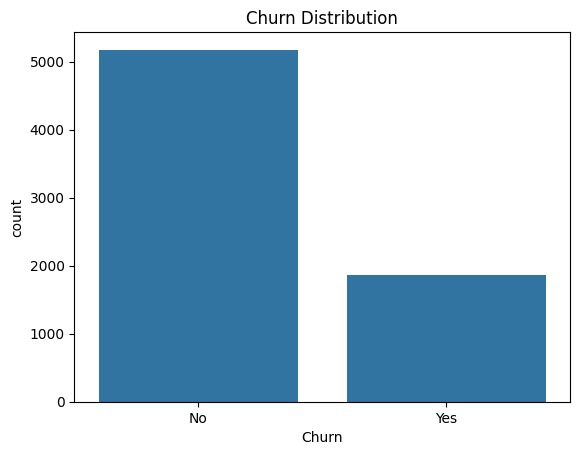

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Visualize the distribution of the target variable (churn)
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()



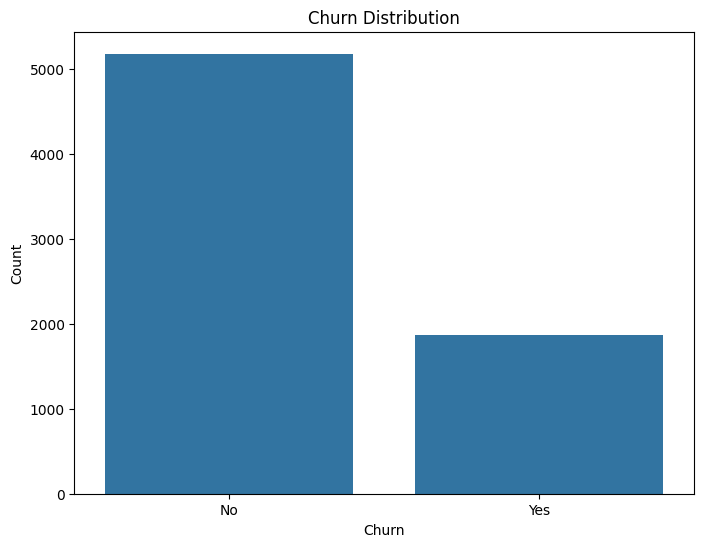

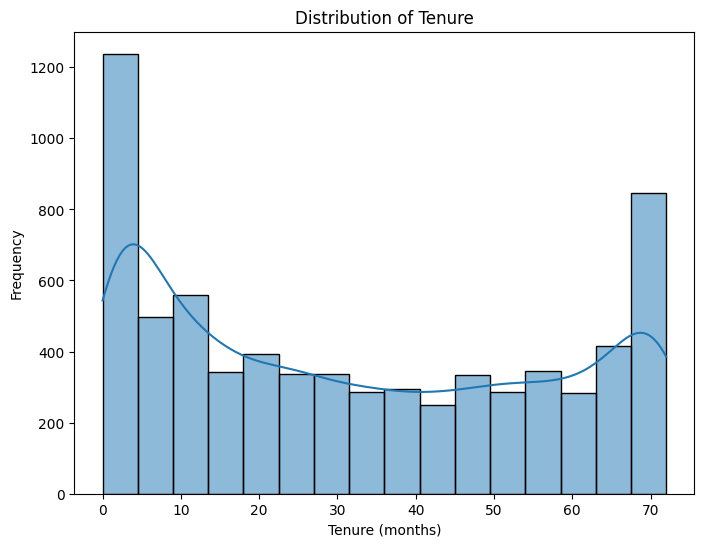

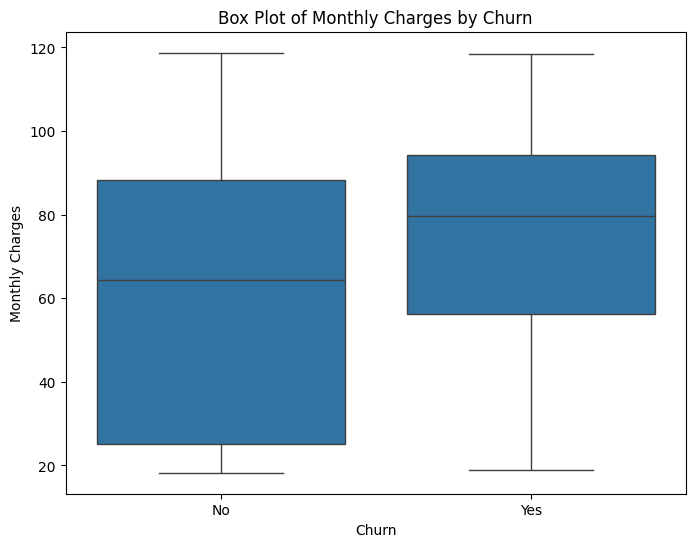

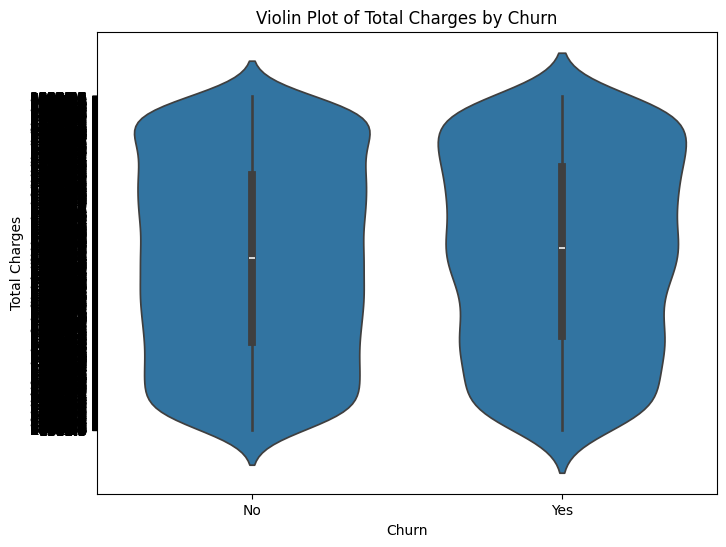

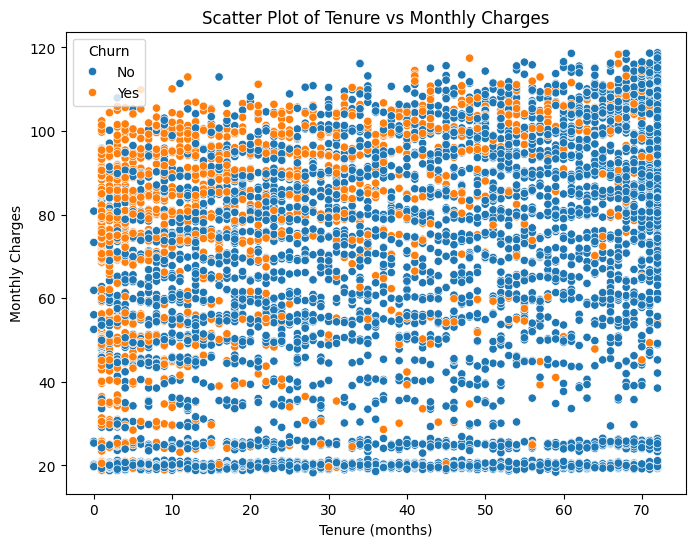

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop non-numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Visualize the distribution of the target variable (churn)
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Distribution plot for a numerical variable (e.g., tenure)
plt.figure(figsize=(8, 6))
sns.histplot(data['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

# Box plot for a numerical variable (e.g., MonthlyCharges)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Box Plot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# Violin plot for a numerical variable (e.g., TotalCharges)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='TotalCharges', data=data)
plt.title('Violin Plot of Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

# Scatter plot to show relationship between two numerical variables (e.g., tenure and MonthlyCharges)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data)
plt.title('Scatter Plot of Tenure vs Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.show()


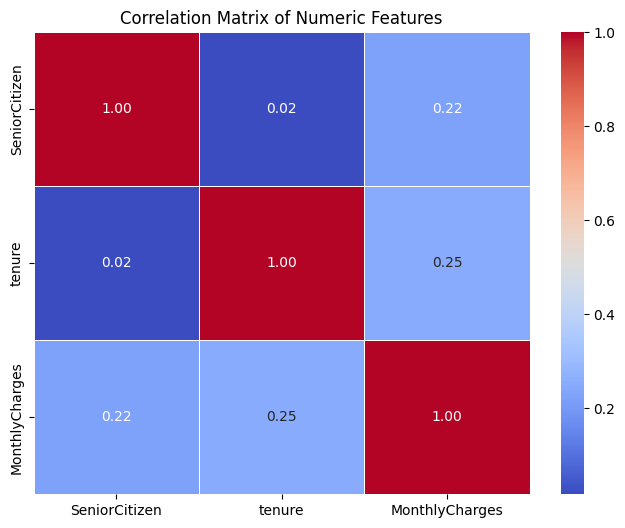

In [28]:
# Correlation heatmap
corr_matrix = data_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Handle missing values
data.ffill(inplace=True)

# Encode categorical variables
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[categorical_features]).toarray()

# Combine encoded features with the rest of the data
data = data.drop(columns=categorical_features)
encoded_df = pd.DataFrame(encoded_features, index=data.index)
data = pd.concat([data, encoded_df], axis=1)

# Convert target variable to numerical
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert 'TotalCharges' to numeric, forcing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill any remaining non-numeric values with the mean of the column
data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)

# Ensure all columns are numeric
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

# Convert feature names to strings
X.columns = X.columns.astype(str)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize logistic regression model
model = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean()}')

# Train the model
model.fit(X_train, y_train)

Cross-validation accuracy scores: [0.80223124 0.81744422 0.78803245 0.79513185 0.80730223]
Mean cross-validation accuracy: 0.8020283975659229


LogisticRegression()

Accuracy: 0.82
Precision: 0.68
Recall: 0.58
F1 Score: 0.63
ROC-AUC: 0.86


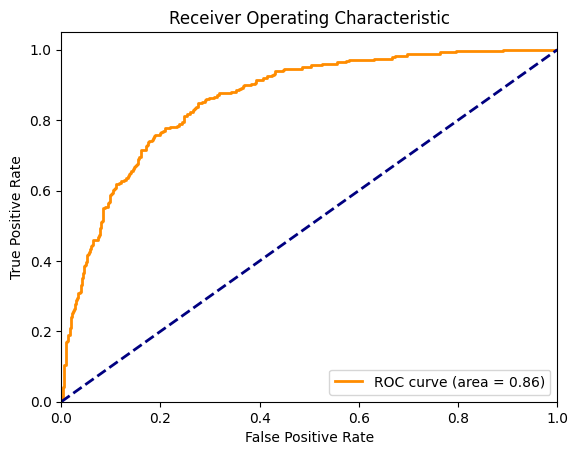

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on validation set
y_val_pred = model.predict(X_val)
y_val_prob = model.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [36]:
import joblib

# Save the model to a file
joblib.dump(model, 'logistic_regression_model.pkl')
print("Model saved to logistic_regression_model.pkl")

Model saved to logistic_regression_model.pkl
